# 1. Predicting Rain in Australia 🦘
* Predict next-day rain by training classification model
* we have to Predict Weather it will be rain or not ? :- Yes - No
* Check this for every reference by Gov :- http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml 

In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# we want our plots to appear inside the notebook
%matplotlib inline
plt.style.use('default')


In [2]:
# Import Dataset 
df = pd.read_csv("data/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
# Checking information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Checking missing values in dataset 
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# 2. Data Cleaning

### a. Parsing Dates

In [6]:
# we will import our data again but with a new parameter `parse_dates`
# this will make our dates in a correct format of Year-month-day
df = pd.read_csv("data/weatherAUS.csv" , low_memory= False , parse_dates = ["Date"])

In [7]:
df.Date

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

### b. Sort Dataframe by order to Avoid any error in future

In [8]:
df.sort_values(by=["Date"] , inplace= True , ascending= True)
df.Date.head(20)

45587   2007-11-01
45588   2007-11-02
45589   2007-11-03
45590   2007-11-04
45591   2007-11-05
45592   2007-11-06
45593   2007-11-07
45594   2007-11-08
45595   2007-11-09
45596   2007-11-10
45597   2007-11-11
45598   2007-11-12
45599   2007-11-13
45600   2007-11-14
45601   2007-11-15
45602   2007-11-16
45603   2007-11-17
45604   2007-11-18
45605   2007-11-19
45606   2007-11-20
Name: Date, dtype: datetime64[ns]

#### Make a copy of Original

In [9]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### c. Add Datetime Parameters in dataset 

In [10]:
# Adding extra columns of Date to understand during insight check 
df_tmp["Month"] = df_tmp.Date.dt.month
df_tmp["Year"] = df_tmp.Date.dt.year
df_tmp["Day"] = df_tmp.Date.dt.day
df_tmp["DayOfYear"] = df_tmp.Date.dt.day_of_year

In [11]:
# Dropping the Traditional Datetime Column
df_tmp.drop("Date", axis=1, inplace=True)


In [12]:
df_tmp.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,DayOfYear
45587,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,7.0,7.0,14.4,23.6,No,Yes,11,2007,1,305
45588,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,5.0,3.0,17.5,25.7,Yes,Yes,11,2007,2,306
45589,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,8.0,7.0,15.4,20.2,Yes,Yes,11,2007,3,307
45590,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,2.0,7.0,13.5,14.1,Yes,Yes,11,2007,4,308
45591,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,7.0,7.0,11.1,15.4,Yes,No,11,2007,5,309


In [13]:
# checking different states with most values 
df_tmp.Location.value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Hobart              3193
Melbourne           3193
Brisbane            3193
Perth               3193
Darwin              3193
MountGambier        3040
Wollongong          3040
Bendigo             3040
Ballarat            3040
Launceston          3040
GoldCoast           3040
Cairns              3040
Albury              3040
AliceSprings        3040
Townsville          3040
Albany              3040
MountGinini         3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Watsonia            3009
Cobar               3009
Witchcliffe         3009
NorfolkIsland       3009
Mildura             3009
Portland            3009
Richmond            3009
WaggaWagga          3009
SydneyAirport       3009
Sale                3009
Nuriootpa           3009
PearceRAAF          3009
Woomera             3009
CoffsHarbour        3009
PerthAirport        3009
MelbourneAirport    3009
Williamtown         3009


### d. Converting String into Categories 

In [14]:
# Making a function which will check all the string contained values 
for label , content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [15]:
# Converting all the string values into category values 
for label , content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [16]:
# checking converted columns 
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 45587 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Location       145460 non-null  category
 1   MinTemp        143975 non-null  float64 
 2   MaxTemp        144199 non-null  float64 
 3   Rainfall       142199 non-null  float64 
 4   Evaporation    82670 non-null   float64 
 5   Sunshine       75625 non-null   float64 
 6   WindGustDir    135134 non-null  category
 7   WindGustSpeed  135197 non-null  float64 
 8   WindDir9am     134894 non-null  category
 9   WindDir3pm     141232 non-null  category
 10  WindSpeed9am   143693 non-null  float64 
 11  WindSpeed3pm   142398 non-null  float64 
 12  Humidity9am    142806 non-null  float64 
 13  Humidity3pm    140953 non-null  float64 
 14  Pressure9am    130395 non-null  float64 
 15  Pressure3pm    130432 non-null  float64 
 16  Cloud9am       89572 non-null   float64 
 17  Cloud3

In [17]:
# checking the Location columns 
df_tmp.Location.cat.categories

Index(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura',
       'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil',
       'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith',
       'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums',
       'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru',
       'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe',
       'Wollongong', 'Woomera'],
      dtype='object')

In [18]:
# Checking Location codes assign by the categorical conversion
df_tmp.Location.cat.codes


45587      9
45588      9
45589      9
45590      9
45591      9
          ..
64190     35
67199     19
70392     18
123830    31
145459    41
Length: 145460, dtype: int8

### e. Filling Missing Values

In [19]:
# checking all missing values 
df_tmp.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
Year                 0
Day                  0
DayOfYear            0
dtype: int64

In [20]:
# checking all the numeric valued columns which needed to be filled 
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [21]:
# Now we will find the missing numeric valued columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [22]:
# Filling numeric rows with mean value
# We have to take the mean value as rain is not complusory to fall by the same amount so we will take average of it.
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill values with mean 
            df_tmp[label] = content.fillna(content.mean()) 

In [23]:
# check if there is any null numerica value remaining 
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### f. Filling and turning categorical variables into numbers 

In [24]:
# Check for columns which aren't numeric 
# So values wwhich are not numeric can be categorical 
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        pd.api.types.is_categorical_dtype(content)
        print(label)

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [25]:
# Turn categorical variable into numbers and fill missing
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # turn categories into numbers and add +1 so there should not be any 0 value
        df_tmp[label] = pd.Categorical(content).codes+1


In [26]:
# Check still is there any missing values
df_tmp.isna().sum()


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Day              0
DayOfYear        0
dtype: int64

# 3. Vizualization

(26.5, -0.5)

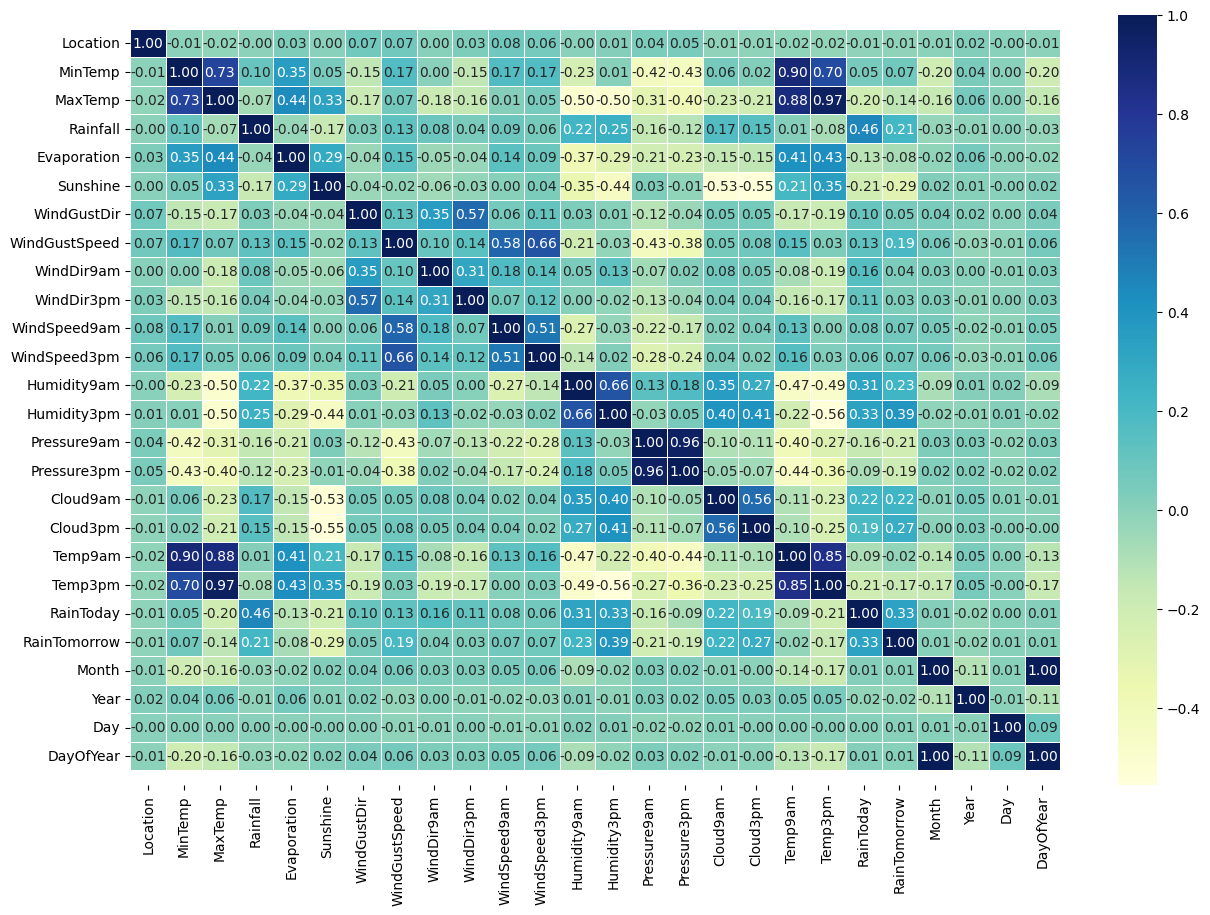

In [27]:
# Correlation matrix vizualization 
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

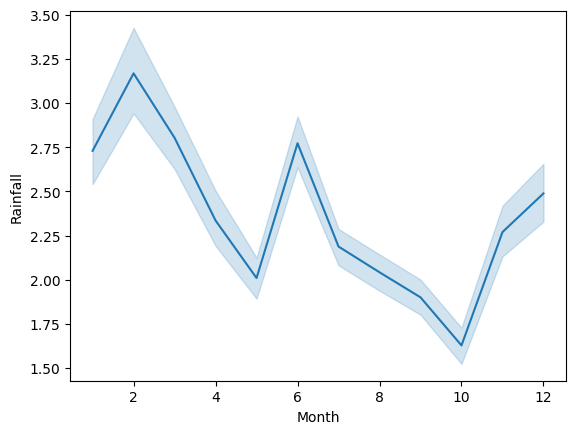

In [28]:
# Which months are more in terms of rainfall
sns.lineplot(x = df_tmp["Month"] , y = df_tmp["Rainfall"])

<AxesSubplot:xlabel='Month', ylabel='MaxTemp'>

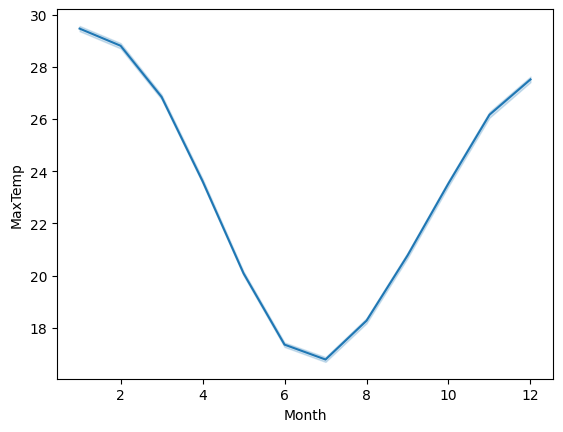

In [29]:
# Checking months and their max temperature
sns.lineplot(x=df_tmp["Month"], y=df_tmp["MaxTemp"])


<AxesSubplot:xlabel='Month', ylabel='MinTemp'>

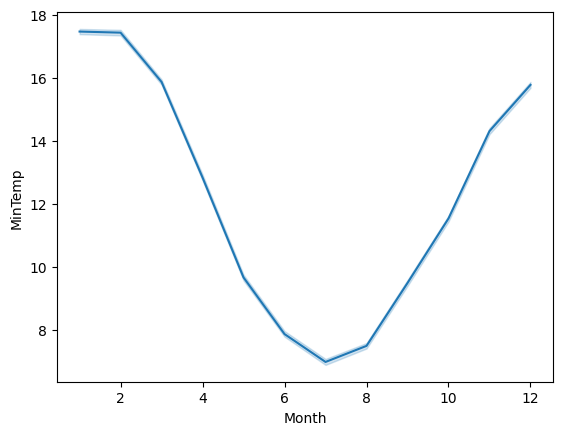

In [30]:
# Checking months and their minimum temperature
sns.lineplot(x=df_tmp["Month"], y=df_tmp["MinTemp"])


<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

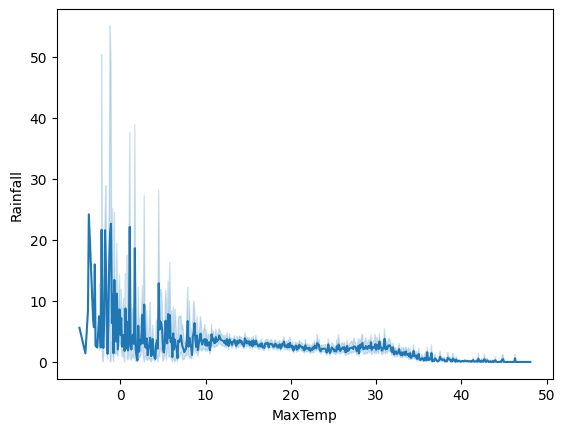

In [31]:
# Checking maxTemp with rainfall to understand how much temperature in Australia can affect in rain
sns.lineplot(x = df_tmp["MaxTemp"] , y = df_tmp["Rainfall"])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

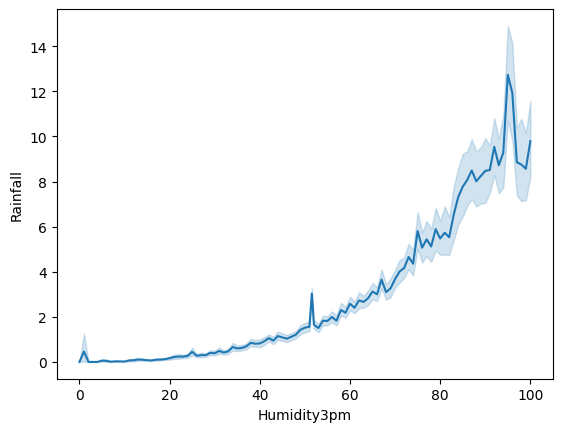

In [32]:
# Here checking Hunimidity & Rainfall with their parameters
sns.lineplot(x = df_tmp["Humidity3pm"] , y = df_tmp["Rainfall"])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

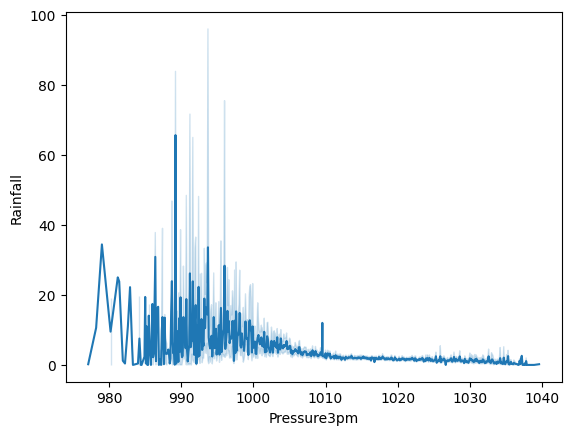

In [33]:
# Here checking wind Pressure & Rainfall with their parameters
sns.lineplot(x = df_tmp["Pressure3pm"], y=df_tmp["Rainfall"])


<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

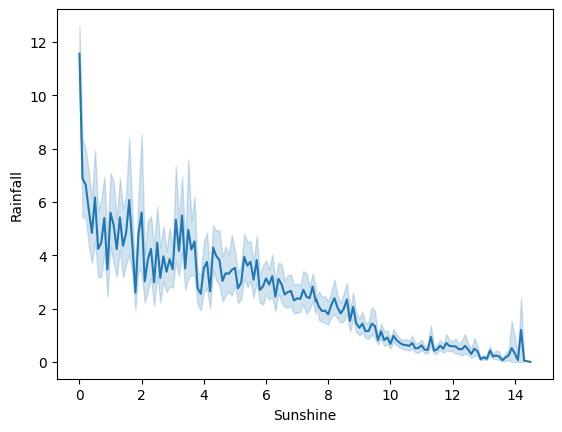

In [34]:
# Here checking Bright Sunshine & Rainfall with their parameters
sns.lineplot(x=df_tmp["Sunshine"], y=df_tmp["Rainfall"] ,)


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

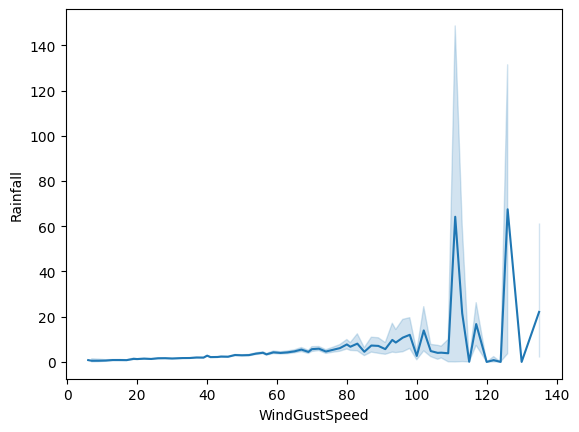

In [35]:
sns.lineplot(x=df_tmp["WindGustSpeed"], y=df_tmp["Rainfall"])


<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

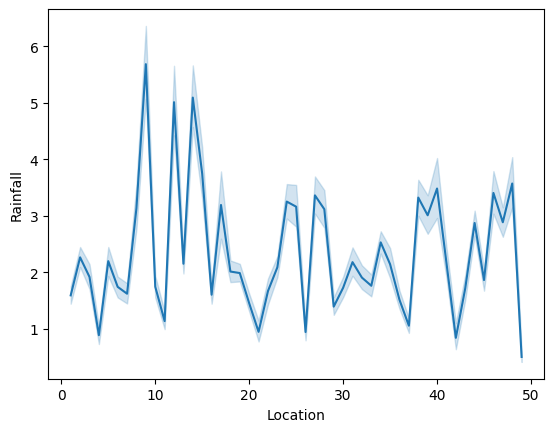

In [36]:
sns.lineplot(x=df_tmp["Location"], y=df_tmp["Rainfall"])


#### Final Report of Data Vizualization (By every graph)

* By Checking Rainfall in mm From Month 11(November) to Month 3(March) There is `Rainy Season`.

* By Checking Maximum Temperatures we have got that from Month 4-7 There is `Winter` , Month 8-11 There is `Summer` .

* By Checking Maximum Temperature and Rainfall we have got that 10-12 C can be enough to rain in `Australia` .

* By Checking `Humidity` and Rainfall we have got that More Humidity == More Rainfall .

* By Checking `Pressure` and Rainfall we have got that Low Pressure == Rainfall .

* By Checking `Daylight Sunshine` and Rainfall we have got that low Sunshine can affect Rainfall .

* By Checking `WindSpeed` and Rainfall we have got that Hight Windspeed == Rainfall .

* By Checking `Location` and Rainfall we have got that Location no.9,10,12,14 have the more rainfall than other locations.

# 4. Modelling

In [37]:
from sklearn.model_selection import train_test_split

# Split data into x and y 
x = df_tmp.drop("RainTomorrow" , axis= 1)
y = df_tmp["RainTomorrow"]

np.random.seed = (42)

# Create validation set 
x_valid , y_valid  = df_tmp.drop("RainTomorrow" , axis= 1) , df_tmp.RainTomorrow


# split data into train and test set 
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.2)



In [38]:
# Create a machine learning model according to the sklearn 
from sklearn.ensemble import RandomForestClassifier

# np.random.seed(42)

# instantiate model
model = RandomForestClassifier()

#fit the model 
model.fit(x_train , y_train)

RandomForestClassifier()

In [39]:
# Score the model
model.score(x_test , y_test)

0.8460401484944314

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# Using different Models to train our model 
models = {
    "Logistic Regression" :  LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SGD Classifier" : SGDClassifier(),
}

# Create a function to train , fit and score the models 
def fit_and_score(models , x_train , x_test , y_train , y_test):
    # Make a dictionary to keep the score of all models 
    model_scores = {}
    # Loop through models 
    for name , model in models.items():
        # fit the model to the data 
        model.fit(x_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test , y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models= models , 
                            x_train= x_train , 
                            x_test= x_test, 
                            y_train= y_train ,
                            y_test = y_test,
                            )
model_scores                        

c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8203629863880104,
 'KNN': 0.8203629863880104,
 'RandomForestClassifier': 0.8467619964251341,
 'SGD Classifier': 0.8114258215316925}

### Model Comparison

<AxesSubplot:>

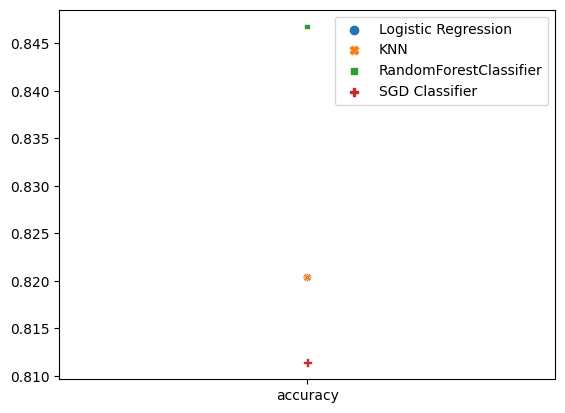

In [42]:
# Compare models
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
sns.scatterplot(data= model_compare)

# 5. Hyperparameter Tuning

### Here we didn't got the good score for `KNN` so we abort it now

In machine learning we need to get good score on multiple models and we need to select best our of it which performs good 

#### Tuning with `RandomizedSearchCV`

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
* SGD Classifier()

=> Why do we even care about SGD Classifier when we already have Logistic Regression?

Logistic Regression by default uses Gradient Descent and as such it would be better to use SGD Classifier on larger data sets. One another reason you might want to use SGD Classifier is, logistic regression, in its vanilla sklearn form, won’t work if you can’t hold the dataset in RAM but SGD will still work.

In [61]:
# Create a hyperparameter grid for Logistic Regression 
log_reg_grid = {
    "C" : np.logspace(-4 , 4 , 20),
    "solver" : ["liblinear"],
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10 , 1000 , 50),
    "max_depth" : [None , 3 , 5, 10],
    "min_samples_split" : np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20 , 2),
}

# Create a hyperparameter grid for SGD Classifier
sgd_grid = {
    "loss": ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"],
    "penalty" : ['l1'],
    # "max_iter" : 10,    
}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the random hyperparameter for the Logistic Regression 
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions= log_reg_grid,
    cv = 5, 
    n_iter = 20, # here n_iter mean any 20 comibnations will be tried 
    verbose =True
)

# Fit random hyperparameter search model for Logistic Regression 
rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
# checking the best parameter
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 78.47599703514607}

In [46]:
# checking the best result
rs_log_reg.score(x_test, y_test)


0.8231472569778633

In [47]:
# Doing Hyperparameter for RandomForest Classifier

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions= rf_grid,
    cv = 5,
    n_iter= 20,
    verbose= True
)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
# checking the best parameter
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': None}

In [49]:
# checking the best result
rs_rf.score(x_test, y_test)

0.8459026536504881

In [62]:
# Doing Hyperparameter with SGD Classifier

rs_sgd  = RandomizedSearchCV(
    SGDClassifier(max_iter= 10),
    param_distributions= sgd_grid,
    cv = 5 ,
    n_iter = 20,
    verbose = True
)

rs_sgd.fit(x_train , y_train)

c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteratio

RandomizedSearchCV(cv=5, estimator=SGDClassifier(max_iter=10), n_iter=20,
                   param_distributions={'loss': ['hinge', 'log',
                                                 'modified_huber', 'perceptron',
                                                 'squared_hinge'],
                                        'penalty': ['l1']},
                   verbose=True)

In [63]:
# checking the best parameter
rs_sgd.best_params_


{'penalty': 'l1', 'loss': 'modified_huber'}

In [64]:
# checking the best result
rs_sgd.score(x_test, y_test)


0.7952701773683487

# Hyperparamter Tuning with `GridSearchCV`
Since our RandomForest model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [77]:
from sklearn.model_selection import GridSearchCV
# Different hyperparameter for our RandomForestClassifier model
rf_grid_search_cv = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5,6],
    'criterion': ['gini', 'entropy']
}

# setup frid hyperparameter search for RandomForestClassifier
gs_rf_clf = GridSearchCV( 
    RandomForestClassifier(),
    param_grid = rf_grid_search_cv,
    cv = 5,
    verbose = True
)

# Fit grid hyperameter search model
gs_rf_clf.fit(x_train , y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]},
             verbose=True)

In [78]:
gs_rf_clf.score(x_test , y_test)

0.8252440533479994

# Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evalute our trained model , first we need to make predictions 

In [85]:
# Make predictions with Tuned model
y_preds = gs_rf_clf.predict(x_test)


In [86]:
y_preds


array([2, 1, 1, ..., 1, 1, 1], dtype=int8)

In [81]:
# Classification metrics
from sklearn.metrics import classification_report


In [84]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.29      0.44       641
           1       0.83      0.97      0.90     22065
           2       0.78      0.37      0.50      6386

    accuracy                           0.83     29092
   macro avg       0.83      0.55      0.61     29092
weighted avg       0.82      0.83      0.80     29092



# Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our Random Forest Classifier model...

In [92]:
# Fit an instance of LogisticRegression
clf = RandomForestClassifier(
    n_estimators = 960,
    max_depth = None,
    min_samples_split = 16,
    min_samples_leaf = 5,
)

clf.fit(x_train, y_train)


RandomForestClassifier(min_samples_leaf=5, min_samples_split=16,
                       n_estimators=960)

In [95]:
# Check coef_
clf.feature_importances_

array([0.02408806, 0.03080671, 0.03166364, 0.08317215, 0.01446661,
       0.05591708, 0.01936679, 0.05193663, 0.01784619, 0.01913298,
       0.01700848, 0.01933389, 0.04488491, 0.21536506, 0.0451172 ,
       0.05459931, 0.0172369 , 0.03985884, 0.02791362, 0.03291886,
       0.06769628, 0.01089406, 0.01366425, 0.01920642, 0.02590508])

In [97]:
clf.feature_names_in_

array(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Month', 'Year',
       'Day', 'DayOfYear'], dtype=object)

In [102]:
# plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()


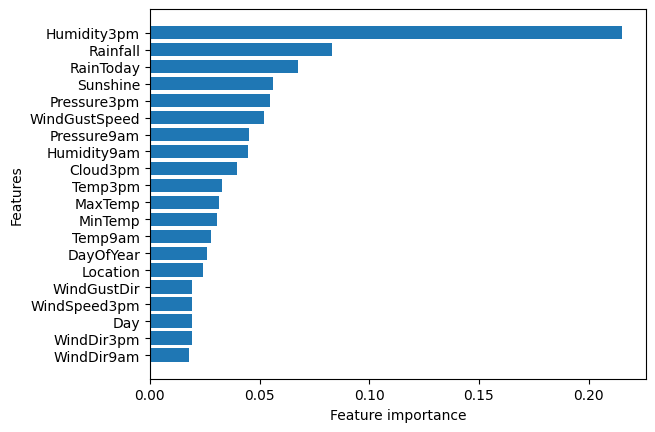

In [104]:
plot_features(x_train.columns, clf.feature_importances_)
